In [361]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,f1_score,classification_report

In [163]:
df = pd.read_csv("train_product_data.csv")

In [164]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",..."


In [165]:
df.shape

(14999, 15)

In [166]:
df.columns


Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [167]:
# plotting the heatmap for the dataset
df['product_category_tree'].value_counts()

product_category_tree
Clothing                       5316
Jewellery                      3218
Footwear                       1083
Automotive                      937
Mobiles & Accessories           768
Home Decor & Festive Needs      714
Kitchen & Dining                610
Computers                       531
Watches                         526
Tools & Hardware                379
Toys & School Supplies          271
Pens & Stationery               264
Baby Care                       224
Bags, Wallets & Belts           158
Name: count, dtype: int64

It can be seen that the category CLOTHING has highest count(5316) as compared to Bags,Wallet & belts with count 158.This means that the Categories are slightly imbalanced.

In [169]:
plt.style.use('ggplot')

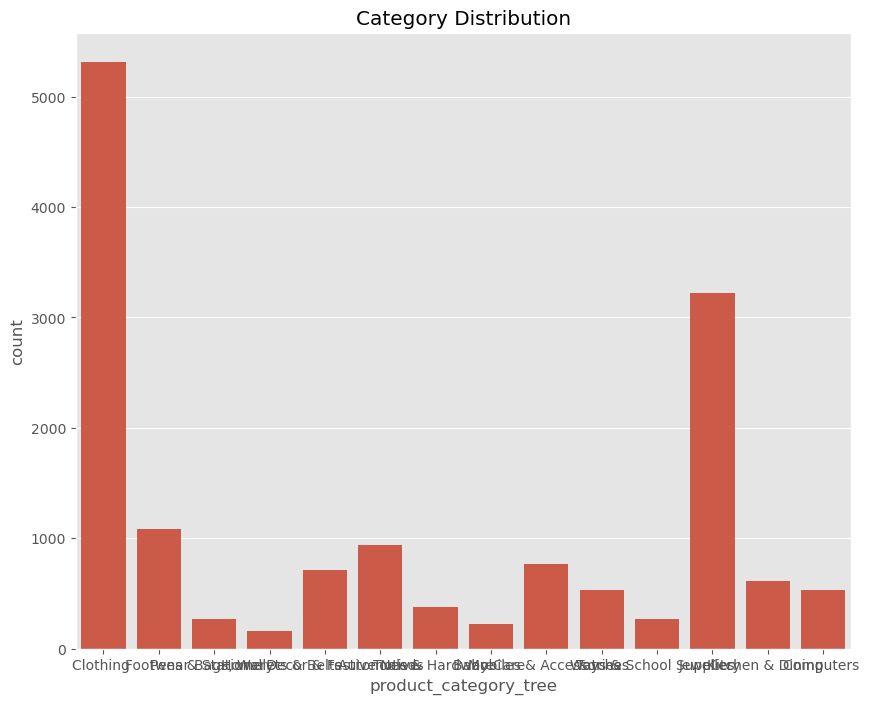

In [170]:
plt.figure(figsize=(10,8))
sns.countplot(data=df, x='product_category_tree')
plt.title('Category Distribution')
plt.show()

In [171]:
df['product_specifications'].duplicated().sum()

916

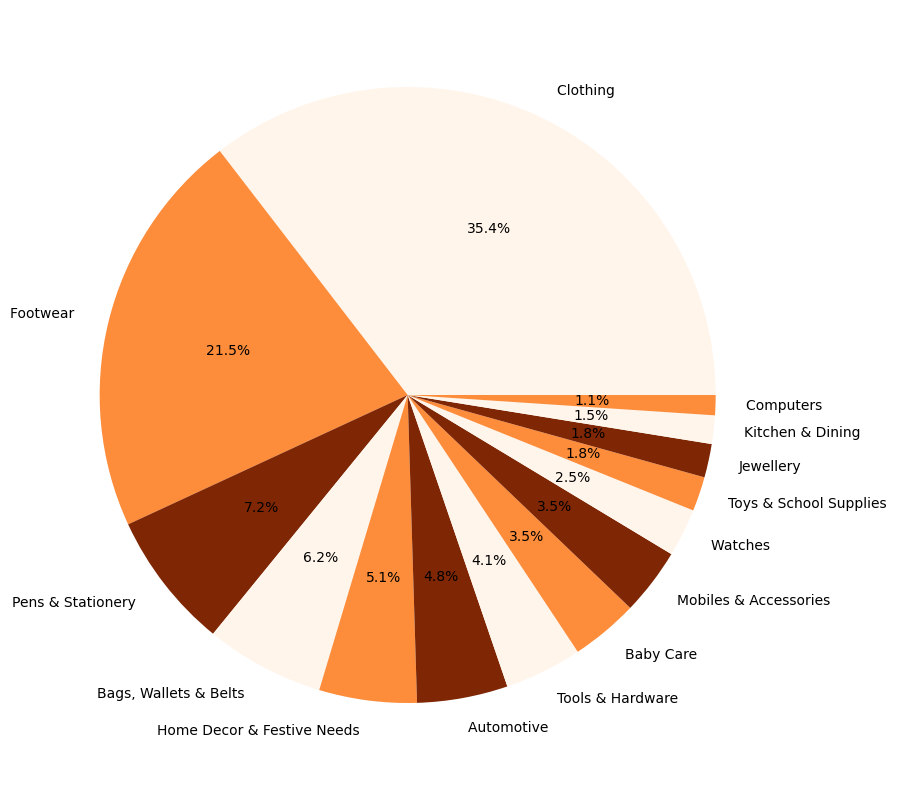

In [172]:
counts = df['product_category_tree'].value_counts()
labels = df['product_category_tree'].unique()
plt.figure(figsize=(15,10))
plt.pie(counts, labels = labels,autopct = '%1.1f%%',colors=plt.cm.Oranges(np.linspace(0,1,3)))
plt.show()

The above is the pie chart depicting the percentage distribution of different categories.

In this project,I am expected to perform Text Classification for easy categorization of items.Clearly from the excel file that I was provided with,the only columns that would contribute to Category prediction are ''product_category_tree'(Target column) and 'description' and 'product_specification' columns.From the analysis performed in the excel file it was concluded that 'specification' and 'product_description' were similar.
Therefore all the independent variables except 'description' are dropped in this project.

In [175]:
df = df.drop(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
        'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product',  'product_rating',
       'overall_rating', 'brand', 'product_specifications'], axis=1)
print(df)

        product_category_tree  \
0                   Clothing    
1                   Footwear    
2                   Clothing    
3                   Clothing    
4                   Footwear    
...                       ...   
14994  Mobiles & Accessories    
14995              Jewellery    
14996  Mobiles & Accessories    
14997              Jewellery    
14998              Jewellery    

                                             description  
0      Key Features of Alisha Solid Women's Cycling S...  
1      Key Features of AW Bellies Sandals Wedges Heel...  
2      Key Features of Alisha Solid Women's Cycling S...  
3      Key Features of Alisha Solid Women's Cycling S...  
4      Key Features of dilli bazaaar Bellies, Corpora...  
...                                                  ...  
14994  TheLostPuppy Back Cover for Apple iPad Air (Mu...  
14995  Kenway Retail Brass Copper Cuff\n             ...  
14996  TheLostPuppy Back Cover for Apple iPad Air 2 (...  
14997  Kenway

In [508]:
df.head(10)

,product_category_tree,text_embedding
0,3,"[0.7527085, 1.2844447, 0.65121377, -0.7389761,..."
1,5,"[-0.020742858, 0.54517144, 0.10339034, -0.3004..."
2,3,"[0.7773936, 1.3219334, 0.64482427, -0.769627, ..."
3,3,"[0.7723251, 1.2939515, 0.5865931, -0.7762399, ..."
4,5,"[-0.13780984, 0.74543905, -0.10576846, -0.3950..."
5,3,"[0.77912855, 1.3330303, 0.5610688, -0.80229867..."
6,5,"[-0.028136006, 0.4615268, 0.010597296, -0.3215..."
7,3,"[-0.027175004, 0.6453247, 0.21924704, -0.44079..."
8,3,"[0.7765802, 1.3421837, 0.594176, -0.7915201, 0..."
9,10,"[0.24362387, 0.11873022, -0.36759764, -0.47646..."


# EXPLORATORY DATA ANALYSIS

In [178]:
#Handling null values
df.isna().sum()

product_category_tree    0
description              1
dtype: int64

In [179]:
mode_value = df['description'].mode()[0]
print(mode_value)

Fashion Jewellery Alloy Necklace - Buy Fashion Jewellery Alloy Necklace only for Rs. 239 from Flipkart.com. Only Genuine Products. 30 Day Replacement Guarantee. Free Shipping. Cash On Delivery!


In [180]:
#Imputing the null value in the description column with its mode
mode_value = df['description'].mode()[0]  # Get the mode (most frequent value)
df['description'].fillna(mode_value, inplace=True)

C:\Users\Akshara Anil\AppData\Local\Temp\ipykernel_13572\2586129542.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['description'].fillna(mode_value, inplace=True)


In [181]:
#Text cleaning using NLP
df['description'][0]

"Key Features of Alisha Solid Women's Cycling Shorts Cotton Lycra Navy, Red, Navy,Specifications of Alisha Solid Women's Cycling Shorts Shorts Details Number of Contents in Sales Package Pack of 3 Fabric Cotton Lycra Type Cycling Shorts General Details Pattern Solid Ideal For Women's Fabric Care Gentle Machine Wash in Lukewarm Water, Do Not Bleach Additional Details Style Code ALTHT_3P_21 In the Box 3 shorts"

In [182]:
df['description'][1]

'Key Features of AW Bellies Sandals Wedges Heel Casuals,AW Bellies Price: Rs. 499 Material: Synthetic Lifestyle: Casual Heel Type: Wedge Warranty Type: Manufacturer Product Warranty against manufacturing defects: 30 days Care instructions: Allow your pair of shoes to air and de-odorize at regular basis; use shoe bags to prevent any stains or mildew; dust any dry dirt from the surface using a clean cloth; do not use polish or shiner,Specifications of AW Bellies General Ideal For Women Occasion Casual Shoe Details Color Red Outer Material Patent Leather Heel Height 1 inch Number of Contents in Sales Package Pack of 1 In the Box One Pair Of Shoes'

In [183]:
#Remove special characters
#Remove Stop words
#Remove excess whitespace,repeated words and overly detailed specifications
def clean(text):
    # Regular expression pattern to clean up unwanted details
    cleaned_text = re.sub(r"\b(?:Key Features of|Specifications of|General|Details|Ideal For|In the Box|Material|Pattern|Fabric|Style Code|Care instructions|Outer Material|Warranty Type|Lifestyle|Heel Type|Heel Height|Pack of \d+|Price)\b|[0-9]+(?:\.\d+)?\s*(?:inch|inches|days|Rs\.)?|[.,;:]", "", text)
    # Removing excess whitespace
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()
    stop_words = set(stopwords.words('english'))
    clean_text = ' '.join(word for word in cleaned_text.split() if word.lower() not in stop_words)

    return clean_text

In [184]:
clean('Key Features of AW Bellies Sandals Wedges Heel Casuals,AW Bellies Price: Rs. 499 Material: Synthetic Lifestyle: Casual Heel Type: Wedge Warranty Type: Manufacturer Product Warranty against manufacturing defects: 30 days Care instructions: Allow your pair of shoes to air and de-odorize at regular basis; use shoe bags to prevent any stains or mildew; dust any dry dirt from the surface using a clean cloth; do not use polish or shiner,Specifications of AW Bellies General Ideal For Women Occasion Casual Shoe Details Color Red Outer Material Patent Leather Heel Height 1 inch Number of Contents in Sales Package Pack of 1 In the Box One Pair Of Shoes')

'AW Bellies Sandals Wedges Heel CasualsAW Bellies Rs Synthetic Casual Wedge Manufacturer Product Warranty manufacturing defects Allow pair shoes air de-odorize regular basis use shoe bags prevent stains mildew dust dry dirt surface using clean cloth use polish shiner AW Bellies Women Occasion Casual Shoe Color Red Patent Leather Number Contents Sales Package One Pair Shoes'

In [185]:
df['description'] = df['description'].apply(lambda x:clean(x))

In [186]:
df['description'][0]

"Alisha Solid Women's Cycling Shorts Cotton Lycra Navy Red Navy Alisha Solid Women's Cycling Shorts Shorts Number Contents Sales Package Cotton Lycra Type Cycling Shorts Solid Women's Care Gentle Machine Wash Lukewarm Water Bleach Additional ALTHT_P_ shorts"

# ENCODING TEXT-TO-FEATURE CONVERSION


In [188]:
# Initialize LabelEncoder
le = LabelEncoder()

# Fit LabelEncoder on the unique values of the 'product_category_tree' column
le.fit(df['product_category_tree'])

# Transform the 'product_category_tree' column with the fitted encoder
df['product_category_tree'] = le.transform(df['product_category_tree'])


In [189]:
df['product_category_tree']

0        3
1        5
2        3
3        3
4        5
        ..
14994    9
14995    7
14996    9
14997    7
14998    7
Name: product_category_tree, Length: 14999, dtype: int32

In [190]:
pip install --upgrade scipy


  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl (44.5 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.14.1 which is incompatible.


In [191]:
pip install --upgrade gensim

  Using cached scipy-1.13.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.13.1-cp312-cp312-win_amd64.whl (45.9 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
Note: you may need to restart the kernel to use updated packages.


In [192]:
#tfidf = TfidfVectorizer()
#tfidf.fit(df['description'])
#description = tfidf.transform(df['description'])
from gensim.models import Word2Vec
sentences = [text.split() for text in df['description']]
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# To create sentence embeddings, you can average the word vectors for each document
def get_sentence_embedding(text):
    words = text.split()
    embeddings = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    return np.mean(embeddings, axis=0) if embeddings else np.zeros(100)

df['text_embedding'] = df['description'].apply(get_sentence_embedding)

In [193]:
df['text_embedding'][0]

array([ 0.7527085 ,  1.2844447 ,  0.65121377, -0.7389761 ,  0.48496827,
       -1.0127721 ,  0.39708567,  0.2500183 , -0.21742594, -0.5175706 ,
        0.6997088 , -0.13934188,  0.64550817,  0.7822136 ,  1.3248751 ,
       -1.6093825 ,  0.10153539, -0.7548905 , -0.5303277 , -0.36425114,
        0.07646213, -0.05469088, -0.52778745, -0.43313187,  1.6647279 ,
       -0.59817266, -0.27678263, -0.8535415 , -1.0237875 ,  0.38269606,
       -0.92747045, -0.3653376 ,  1.1833996 ,  0.24377187, -0.0715231 ,
        2.1929407 , -0.9131411 ,  0.09275793, -0.55035955,  0.06361257,
       -0.15403329,  0.73216087,  0.2902624 ,  0.949954  , -0.76096094,
       -0.27152827, -0.99332213, -0.24657977, -0.8851263 ,  0.45671427,
       -0.06295077, -1.0208329 , -1.0785433 , -0.99813825,  0.8242079 ,
       -0.20824257,  0.6912541 , -1.0951366 ,  0.57429934, -0.8041258 ,
        0.17110498, -0.65547353, -0.5074845 , -0.4005743 , -0.68956995,
       -0.171748  , -1.9315268 , -0.12780656, -0.39170426,  0.44

In [194]:
df['text_embedding'].shape

(14999,)

In [195]:
df.columns

Index(['product_category_tree', 'description', 'text_embedding'], dtype='object')

In [196]:
df.head()

,product_category_tree,description,text_embedding
0,3,Alisha Solid Women's Cycling Shorts Cotton Lyc...,"[0.7527085, 1.2844447, 0.65121377, -0.7389761,..."
1,5,AW Bellies Sandals Wedges Heel CasualsAW Belli...,"[-0.020742858, 0.54517144, 0.10339034, -0.3004..."
2,3,Alisha Solid Women's Cycling Shorts Cotton Lyc...,"[0.7773936, 1.3219334, 0.64482427, -0.769627, ..."
3,3,Alisha Solid Women's Cycling Shorts Cotton Lyc...,"[0.7723251, 1.2939515, 0.5865931, -0.7762399, ..."
4,5,dilli bazaaar Bellies Corporate Casuals Casual...,"[-0.13780984, 0.74543905, -0.10576846, -0.3950..."


In [197]:
df = df.drop(['description'],axis=1)

In [329]:
X = df.drop(columns=['product_category_tree'])  # Features
y = df[['product_category_tree']]  # Target variable

# First split: 80% train, 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Second split: Split the 20% temporary set into 10% validation and 10% test
#X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [262]:
X_train.shape

(10499, 1)

In [264]:
y_train.shape

(10499, 1)

In [266]:
X_test.shape

(4500, 1)

In [268]:
y_test.shape

(4500, 1)

In [331]:
# Reshape X_train and X_test if they are 1D arrays
X_train = X_train['text_embedding'].tolist()
X_test = X_test['text_embedding'].tolist()
y_train = y_train['product_category_tree'].tolist()
y_test = y_test['product_category_tree'].tolist()

In [333]:
X_train.shape

AttributeError: 'list' object has no attribute 'shape'

In [335]:
X_test.shape

AttributeError: 'list' object has no attribute 'shape'

In [276]:
df.head()

,product_category_tree,text_embedding
0,3,"[0.7527085, 1.2844447, 0.65121377, -0.7389761,..."
1,5,"[-0.020742858, 0.54517144, 0.10339034, -0.3004..."
2,3,"[0.7773936, 1.3219334, 0.64482427, -0.769627, ..."
3,3,"[0.7723251, 1.2939515, 0.5865931, -0.7762399, ..."
4,5,"[-0.13780984, 0.74543905, -0.10576846, -0.3950..."


In [278]:
y_train.shape

(10499, 1)

In [280]:
type(y_train)

pandas.core.frame.DataFrame

# MODEL TRAINING

In [283]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

In [337]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Predictions:", y_pred)

Predictions: [ 9 10  7 ... 10  4  9]


In [399]:
f1_score_clf = f1_score(y_test,y_pred,average = 'weighted')

In [401]:
print(f1_score_clf)

0.9021656466125056


In [403]:
classification_clf = classification_report(y_test,y_pred_lr)
print(classification_clf)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       280
           1       0.73      0.59      0.65        61
           2       0.87      0.57      0.68        46
           3       0.98      0.99      0.99      1591
           4       0.73      0.91      0.81       151
           5       0.96      0.96      0.96       320
           6       0.86      0.92      0.89       214
           7       0.99      0.99      0.99       974
           8       0.79      0.84      0.81       162
           9       0.91      0.87      0.89       247
          10       0.52      0.25      0.34        91
          11       0.95      0.88      0.92       111
          12       0.64      0.79      0.71        75
          13       0.98      0.98      0.98       177

    accuracy                           0.94      4500
   macro avg       0.85      0.82      0.83      4500
weighted avg       0.94      0.94      0.93      4500



In [339]:
from sklearn.multiclass import OneVsRestClassifier

In [379]:
models = { 
    'LogisticRegression' :LogisticRegression(),
    'RandomForestCLassifier' :RandomForestClassifier(),
    'SVC':SVC(),
    'MultinomialNB' :MultinomialNB(),
    'OneVsRestClassifier':OneVsRestClassifier(LogisticRegression)
    
}

In [365]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
print("Predictions:",y_pred)


Predictions: [ 9 12  7 ... 12  4  9]


C:\Users\Akshara Anil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [383]:
f1_score_lr = f1_score(y_test,y_pred_lr,average = 'weighted')

In [377]:
print(f1_score_lr)

0.9344008527929751


In [369]:
classification_lr = classification_report(y_test,y_pred_lr)

In [373]:
print(classification_lr)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       280
           1       0.73      0.59      0.65        61
           2       0.87      0.57      0.68        46
           3       0.98      0.99      0.99      1591
           4       0.73      0.91      0.81       151
           5       0.96      0.96      0.96       320
           6       0.86      0.92      0.89       214
           7       0.99      0.99      0.99       974
           8       0.79      0.84      0.81       162
           9       0.91      0.87      0.89       247
          10       0.52      0.25      0.34        91
          11       0.95      0.88      0.92       111
          12       0.64      0.79      0.71        75
          13       0.98      0.98      0.98       177

    accuracy                           0.94      4500
   macro avg       0.85      0.82      0.83      4500
weighted avg       0.94      0.94      0.93      4500



In [381]:
#for model_name, model in models.items():#
 #   model.fit(X_train, y_train)
  #  y_pred = model.predict(X_test)
    #f1_score = f1_score(y_test, y_pred)
   # print(f"F1 Score of {model_name} on test data: {f1_score}")
  #  classification_result = classification_report(y_test,y_pred)
    

C:\Users\Akshara Anil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Akshara Anil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Akshara Anil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being se

ValueError: Negative values in data passed to MultinomialNB (input X)

In [385]:
random =  RandomForestClassifier()
random.fit(X_train,y_train)
y_pred_random = random.predict(X_test)
print("Predictions:",y_pred_random)



Predictions: [ 9 12  7 ... 10  4  9]


In [389]:
f1_score_random = f1_score(y_test,y_pred_lr,average = 'weighted')

In [391]:
print(f1_score_random)

0.9344008527929751


In [393]:
classification_random = classification_report(y_test,y_pred_random)

In [395]:
print(classification_random)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       280
           1       0.89      0.51      0.65        61
           2       0.88      0.80      0.84        46
           3       0.98      0.99      0.99      1591
           4       0.95      0.96      0.95       151
           5       0.97      0.97      0.97       320
           6       0.89      0.94      0.92       214
           7       0.99      0.99      0.99       974
           8       0.84      0.91      0.87       162
           9       0.96      0.98      0.97       247
          10       0.83      0.59      0.69        91
          11       0.95      0.92      0.94       111
          12       0.73      0.81      0.77        75
          13       1.00      0.98      0.99       177

    accuracy                           0.96      4500
   macro avg       0.92      0.88      0.89      4500
weighted avg       0.96      0.96      0.96      4500



Since out of the 3 models trained on the training data,Random Forest Classifier seems to work well with a higher F1 Score of96%

In [ ]:
Therefore,am training my model using Random Forest Classifier.

# MODEL TRAINING

In [468]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred_model = model.predict(X_test)
print("Predictions:",y_pred_model)

Predictions: [ 9 12  7 ... 10  4  9]


C:\Users\Akshara Anil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [470]:
trial_description ="""Key Features of AW Bellies Sandals Wedges Heel Casuals,AW Bellies Price: Rs. 499 Material: Synthetic Lifestyle: Casual Heel Type: Wedge Warranty Type: Manufacturer Product Warranty against manufacturing defects: 30 days Care instructions: Allow your pair of shoes to air and de-odorize at regular basis; use shoe bags to prevent any stains or mildew; dust any dry dirt from the surface using a clean cloth; do not use polish or shiner,Specifications of AW Bellies General Ideal For Women Occasion Casual Shoe Details Color Red Outer Material Patent Leather Heel Height 1 inch Number of Contents in Sales Package Pack of 1 In the Box One Pair Of Shoes"""

In [472]:
cleaned_trial_description= clean(trial_description)

In [474]:
encoded_description = get_sentence_embedding(cleaned_trial_description)

In [476]:
input_features = encoded_description.tolist()

In [494]:
reshaped = np.array(input_features).reshape(1,-1)

In [496]:
reshaped_list = reshaped.tolist()

In [498]:
y_pred_random = model.predict(reshaped_list)

In [500]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred_model = model.predict(reshaped_list)
print("Predictions:",y_pred_random)

Predictions: [5]


C:\Users\Akshara Anil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [506]:
df.head()

,product_category_tree,text_embedding
0,3,"[0.7527085, 1.2844447, 0.65121377, -0.7389761,..."
1,5,"[-0.020742858, 0.54517144, 0.10339034, -0.3004..."
2,3,"[0.7773936, 1.3219334, 0.64482427, -0.769627, ..."
3,3,"[0.7723251, 1.2939515, 0.5865931, -0.7762399, ..."
4,5,"[-0.13780984, 0.74543905, -0.10576846, -0.3950..."


In [510]:
df['product_category_tree'].unique()

array([ 3,  5, 10,  2,  6,  0, 11,  1,  9, 13, 12,  7,  8,  4])

In [514]:
test_data = pd.read_excel('test_data.xlsx')

In [516]:
test_data.head()

,uniq_id,crawl_timestamp,product_url,product_name,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,4fb99d98225f415e7ece96938e95628f,2015-12-20 08:26:17 +0000,http://www.flipkart.com/v-v-art-brass-bracelet...,V&V ART Brass Bracelet,BBAE6NYHCDTEZJTB,470.0,423.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,V&V ART Brass Bracelet - Buy V&V ART Brass Bra...,No rating available,No rating available,V&V ART,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,4ea284c8d38b2ea97a1c2a26f34e057c,2015-12-20 08:26:17 +0000,http://www.flipkart.com/kalpaveda-copper-cuff/...,Kalpaveda Copper Copper Cuff,BBAEDFFKZJTY7SZZ,1200.0,1200.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,Kalpaveda Copper Copper Cuff\n ...,No rating available,No rating available,Kalpaveda,"{""product_specification""=>[{""key""=>""Stretchabl..."
2,ee6ce2c7045c54257e2a0b590e09c296,2015-12-20 08:26:17 +0000,http://www.flipkart.com/thelostpuppy-book-cove...,Thelostpuppy Book Cover for Apple iPad Air,ACCEA4DZH6M5SFVH,2199.0,599.0,"[""http://img5a.flixcart.com/image/cases-covers...",False,Thelostpuppy Book Cover for Apple iPad Air (Mu...,No rating available,No rating available,Thelostpuppy,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
3,e797ba3b5f2e2d1fdc520e48486ab60e,2015-12-20 08:26:17 +0000,http://www.flipkart.com/riana-copper-bangle/p/...,Riana Copper Copper Bangle,BBAEAXFQHHMF3EYZ,2499.0,649.0,"[""http://img5a.flixcart.com/image/bangle-brace...",False,Riana Copper Copper Bangle - Buy Riana Copper ...,5,5,Riana,"{""product_specification""=>[{""key""=>""Collection..."
4,f4d8d43858c8858c68d75ce07ac641c0,2015-12-20 08:26:17 +0000,http://www.flipkart.com/inox-jewelry-stainless...,Inox Jewelry Stainless Steel Cuff,BBAECH63WYDG6TE2,1629.0,1222.0,"[""http://img6a.flixcart.com/image/bangle-brace...",False,Inox Jewelry Stainless Steel Cuff\n ...,No rating available,No rating available,Inox Jewelry,"{""product_specification""=>[{""key""=>""Stretchabl..."


In [526]:
test_data = test_data.drop(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
        'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product',  'product_rating',
       'overall_rating', 'brand', 'product_specifications'])
print(test_data)

KeyError: "['uniq_id', 'crawl_timestamp', 'product_url', 'product_name', 'pid', 'retail_price', 'discounted_price', 'image', 'is_FK_Advantage_product', 'product_rating', 'overall_rating', 'brand', 'product_specifications'] not found in axis"

In [528]:
df = df.drop(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name', 'pid', 'retail_price', 
              'discounted_price', 'image', 'is_FK_Advantage_product', 'product_rating', 
              'overall_rating', 'brand', 'product_specifications'], axis=1, errors='ignore')


In [530]:
test_data = test_data.drop(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name', 'pid', 'retail_price', 
              'discounted_price', 'image', 'is_FK_Advantage_product', 'product_rating', 
              'overall_rating', 'brand', 'product_specifications'], axis=1, errors='ignore')
#dropped unwanted columns

In [532]:
test_data.head(10)

,description
0,V&V ART Brass Bracelet - Buy V&V ART Brass Bra...
1,Kalpaveda Copper Copper Cuff\n ...
2,Thelostpuppy Book Cover for Apple iPad Air (Mu...
3,Riana Copper Copper Bangle - Buy Riana Copper ...
4,Inox Jewelry Stainless Steel Cuff\n ...
5,Thelostpuppy Book Cover for Apple iPad Air 2 (...
6,Ridhi Sidhi Collection Brass Bangle Set (Pack ...
7,Thelostpuppy Book Cover for Apple iPad Air 2 (...
8,Ridhi Sidhi Collection Brass Bangle Set (Pack ...
9,Theskinmantra Sleeve for All versions of Apple...


In [540]:
type(test_data['description'])

pandas.core.series.Series

In [542]:
test_data['description'] = test_data['description'].apply(lambda x:clean(x))  #Cleaned the description column(removed special charcters,number and others)

In [544]:
test_data['description'][0]

'V&V ART Brass Bracelet - Buy V&V ART Brass Bracelet Rs Flipkartcom Genuine Products Day Replacement Guarantee Free Shipping Cash Delivery!'

In [548]:
test_data['text_embedding'] = test_data['description'].apply(get_sentence_embedding)     #encoded description column

In [550]:
test_data['text_embedding']

0       [-0.004662484, 0.08426651, 0.03971814, 0.13045...
1       [0.023783287, 0.25988474, -0.014385369, -0.271...
2       [-0.7379114, 0.24970518, -0.025505578, -0.3404...
3       [0.10730499, 0.14997752, -0.058914926, 0.04730...
4       [-0.041113608, 0.19204466, -0.041493397, -0.18...
                              ...                        
2529    [-0.8031834, -0.786172, 0.14531116, 0.3188182,...
2530    [-0.77147466, -0.74237305, 0.24009937, 0.29037...
2531    [-0.5845192, -0.6457011, 0.19285637, 0.2418975...
2532    [-0.5845192, -0.6457011, 0.19285637, 0.2418975...
2533    [-0.5845192, -0.6457011, 0.19285637, 0.2418975...
Name: text_embedding, Length: 2534, dtype: object

In [552]:
listed_encoded_data = test_data['text_embedding'].tolist()

In [554]:
listed_encoded_data

[array([-0.00466248,  0.08426651,  0.03971814,  0.13045226, -0.37414244,
        -0.8221236 ,  0.42271337,  0.9363408 ,  1.5140852 ,  0.11439426,
         0.8130135 , -1.219369  ,  0.31706265,  1.2252448 ,  0.33164483,
         0.40268707, -0.62447375, -0.34825104, -0.53405493, -1.4256688 ,
         1.2833506 ,  2.2533429 ,  1.133358  , -0.39311963,  0.21079563,
        -0.8504966 ,  0.03027299, -0.16477905, -1.5719918 ,  0.97167224,
         2.0943863 , -0.19688348,  1.2327882 , -1.4646665 , -0.37014902,
         0.6504184 ,  0.4792603 ,  0.54428643, -1.527821  , -0.27380887,
        -0.87523067, -0.9036381 , -1.1507474 , -0.82344747,  1.0076555 ,
         0.46600094,  0.00884304,  1.1102008 ,  0.60841745,  0.7930398 ,
        -0.6264817 , -1.3697639 ,  0.00629404, -0.66825944,  1.7537178 ,
         0.07427595,  1.1727116 , -0.98132426,  0.6445588 , -0.19342802,
         0.30120835, -0.02024713,  1.9645071 ,  1.2992396 , -1.8127598 ,
         1.846451  , -0.1742763 ,  1.7564605 , -1.4

In [558]:
model = LogisticRegression()
model.fit(X_train,y_train)
model_prediction = model.predict(listed_encoded_data)
print("Predictions: ",model_prediction)

Predictions: [7 7 9 ... 8 8 8]


C:\Users\Akshara Anil\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [570]:
le = LabelEncoder()
encoded_labels = le.fit_transform(test_data['text_embedding'])

,product_category_tree,text_embedding
0,3,"[0.7527085, 1.2844447, 0.65121377, -0.7389761,..."
1,5,"[-0.020742858, 0.54517144, 0.10339034, -0.3004..."
2,3,"[0.7773936, 1.3219334, 0.64482427, -0.769627, ..."
3,3,"[0.7723251, 1.2939515, 0.5865931, -0.7762399, ..."
4,5,"[-0.13780984, 0.74543905, -0.10576846, -0.3950..."
...,...,...
75,5,"[0.12098617, 0.7576482, 0.15242927, -0.0128496..."
76,5,"[-0.0021830925, 0.49553236, 0.28004098, 0.1263..."
77,13,"[-0.24889663, 0.3245973, 0.113056496, -0.23217..."
78,5,"[-0.05794147, 0.28465194, 0.18277599, 0.123720..."
